In [1]:
!pip install denoising_diffusion_pytorch
!pip install pydrive
!pip install pytorch-ignite
!pip install torch-fidelity
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.8/917.8 kB 13.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86

In [2]:
import torch
from denoising_diffusion_pytorch import Unet, GaussianDiffusion
from google.colab import drive
import tarfile
import os
import shutil
"""
drive.mount('/content/drive')

# Specify the path where the .tar.gz file is mounted
PATH = '/content/drive/MyDrive/INF8225/imagesChats/dataset-part3'

# Define the name of the .tar.gz file
tar_file_name = 'dataset-part3.tar.gz'  # Change this to the actual name of your .tar.gz file

# Open the .tar.gz file
with tarfile.open(os.path.join(PATH, tar_file_name), 'r:gz') as tar_ref:
    # Extract all contents to the specified path
    tar_ref.extractall(path=PATH)
    print("Extraction completed.")

# Move all PNG files to the root of the extraction directory
extracted_files = os.listdir(PATH)
for file_name in extracted_files:
    if file_name.lower().endswith('.png'):
        shutil.move(os.path.join(PATH, file_name), PATH)

print("Extraction and restructuring completed successfully.")
"""

'\ndrive.mount(\'/content/drive\')\n\n# Specify the path where the .tar.gz file is mounted\nPATH = \'/content/drive/MyDrive/INF8225/imagesChats/dataset-part3\'\n\n# Define the name of the .tar.gz file\ntar_file_name = \'dataset-part3.tar.gz\'  # Change this to the actual name of your .tar.gz file\n\n# Open the .tar.gz file\nwith tarfile.open(os.path.join(PATH, tar_file_name), \'r:gz\') as tar_ref:\n    # Extract all contents to the specified path\n    tar_ref.extractall(path=PATH)\n    print("Extraction completed.")\n\n# Move all PNG files to the root of the extraction directory\nextracted_files = os.listdir(PATH)\nfor file_name in extracted_files:\n    if file_name.lower().endswith(\'.png\'):\n        shutil.move(os.path.join(PATH, file_name), PATH)\n\nprint("Extraction and restructuring completed successfully.")\n'

In [3]:
from google.colab import drive
import tarfile
import os
import shutil

drive.mount('/content/drive')
"""
# Specify the path where the .tar.gz file is mounted
PATH = '/content/drive/MyDrive/INF8225/imagesChats/dataset-part3'

# Define the name of the .tar.gz file
tar_file_name = 'dataset-part3.tar.gz'  # Change this to the actual name of your .tar.gz file

# Open the .tar.gz file
print("Extracting files...")
with tarfile.open(os.path.join(PATH, tar_file_name), 'r:gz') as tar_ref:
    # Extract all contents to the specified path
    tar_ref.extractall(path=PATH)
    print("Extraction completed.")

# Move all PNG files to the root of the extraction directory
print("Restructuring extracted files...")
extracted_files = os.listdir(PATH)
png_count = 0
for file_name in extracted_files:
    if file_name.lower().endswith('.png'):
        shutil.move(os.path.join(PATH, file_name), PATH)
        png_count += 1

if png_count == 0:
    print("No PNG files found after extraction.")
else:
    print(f"{png_count} PNG files moved to the root of the extraction directory.")

print("Extraction and restructuring completed successfully.")"""

Mounted at /content/drive


'\n# Specify the path where the .tar.gz file is mounted\nPATH = \'/content/drive/MyDrive/INF8225/imagesChats/dataset-part3\'\n\n# Define the name of the .tar.gz file\ntar_file_name = \'dataset-part3.tar.gz\'  # Change this to the actual name of your .tar.gz file\n\n# Open the .tar.gz file\nprint("Extracting files...")\nwith tarfile.open(os.path.join(PATH, tar_file_name), \'r:gz\') as tar_ref:\n    # Extract all contents to the specified path\n    tar_ref.extractall(path=PATH)\n    print("Extraction completed.")\n\n# Move all PNG files to the root of the extraction directory\nprint("Restructuring extracted files...")\nextracted_files = os.listdir(PATH)\npng_count = 0\nfor file_name in extracted_files:\n    if file_name.lower().endswith(\'.png\'):\n        shutil.move(os.path.join(PATH, file_name), PATH)\n        png_count += 1\n\nif png_count == 0:\n    print("No PNG files found after extraction.")\nelse:\n    print(f"{png_count} PNG files moved to the root of the extraction directory."

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


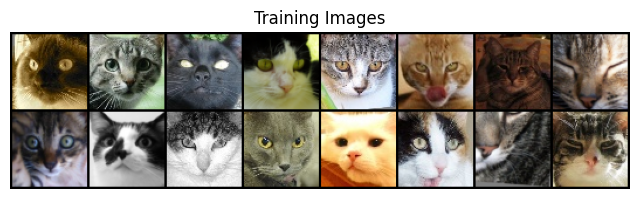

In [21]:
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import torchvision.datasets as dset
import torch.utils.data as data

dataroot = "/content/drive/MyDrive/INF8225/imagesChats/"
image_size = 64
batch_size = 16
num_epochs = 5
workers = 2
ngpu = 1

#Create the dataset
dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

#Calculate the number of images for training and testing
num_total = len(dataset)
num_test = 128  # Take only 128 images for testing
num_train = num_total - num_test  # Remaining images for training

#Split the dataset into training and testing subsets
train_dataset, test_dataset = data.random_split(dataset, [num_train, num_test])

#Create the data loaders
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                               shuffle=True, num_workers=workers)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=num_test,
                                              shuffle=False, num_workers=workers)

#Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

#Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(), (1, 2, 0)))
plt.show()

In [22]:
from ignite.metrics import FID, InceptionScore

model = Unet(
    dim = 32,
    dim_mults = (1, 2, 4, 8),
    flash_attn = True
).cuda()

diffusion = GaussianDiffusion(
    model,
    image_size = image_size,
    timesteps = 1000,    # number of steps
    sampling_timesteps = 250
).cuda()

is_metric = InceptionScore(device=device, output_transform=lambda x: x[0]).cuda()

is_values = []

img_list = []
losses = []
iters = 0

for epoch in range(num_epochs):
    print("Ceci est epoch: " + str(epoch))
    for i, data in enumerate(dataloader, 0):
        real_cpu = data[0].to(device)
        loss = diffusion(real_cpu)
        loss.backward()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss: %.4f'
                  % (epoch, num_epochs, i, len(dataloader), loss))

        # Save Losses for plotting later
        losses.append(loss)

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake =  diffusion.sample(batch_size = 64)
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))
        iters += 1



# after a lot of training

sampled_images = diffusion.sample(batch_size = 4)
sampled_images.shape # (4, 3, 128, 128)"""

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:01<00:00, 85.8MB/s] 


Ceci est epoch: 0
[0/5][0/1499]	Loss: 0.4947


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer

model2 = Unet(
    dim = 32,
    dim_mults = (1, 2, 4, 8),
    flash_attn = True
).cuda()

diffusion2 = GaussianDiffusion(
    model2,
    image_size = 64,
    timesteps = 1000,           # number of steps
    sampling_timesteps = 250    # number of sampling timesteps (using ddim for faster inference [see citation for ddim paper])
).cuda()

trainer = Trainer(
    diffusion2,
    dataroot,
    train_batch_size = 16,
    train_lr = 8e-5,
    train_num_steps = 20000,         # total training steps
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    amp = True,                       # turn on mixed precision
    calculate_fid = False,              # whether to calculate fid during training
    num_fid_samples = 5,
    save_and_sample_every = 500,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(split_batches=True)
  warnings.warn(


  0%|          | 0/20000 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [6]:
# Define paths
source_folder = '/content/results'  # Replace 'results' with the actual name of your folder
destination_folder = '/content/drive/MyDrive/INF8225/modeles'

# Iterate over files in the source folder
for file_name in os.listdir(source_folder):
    if file_name.endswith('.png'):
        # Construct full paths
        source_file_path = os.path.join(source_folder, file_name)
        destination_file_path = os.path.join(destination_folder, file_name)

        # Copy the file to the destination folder
        shutil.copy(source_file_path, destination_file_path)

        print(f"File '{file_name}' copied to '{destination_folder}'")

print("All PNG files copied successfully to Google Drive!")

File 'sample-1.png' copied to '/content/drive/MyDrive/INF8225/modeles'
All PNG files copied successfully to Google Drive!


In [16]:
sampled_images = diffusion.sample(batch_size = 64)
sampled_images.shape # (4, 3, 128, 128)

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

torch.Size([64, 3, 64, 64])

In [17]:
def plot_image(sampled_images):
  # Display the images using Matplotlib
  plt.figure(figsize=(10, 10))
  plt.axis("off")
  plt.title("Sampled Images")

  # Arrange images in a grid
  sampled_grid = vutils.make_grid(sampled_images.cpu(), padding=2, normalize=True)

  # Convert from torch Tensor to numpy array and transpose dimensions for imshow
  sampled_grid = sampled_grid.numpy().transpose((1, 2, 0))

  # Display the grid of images
  plt.imshow(sampled_grid)
  plt.show()


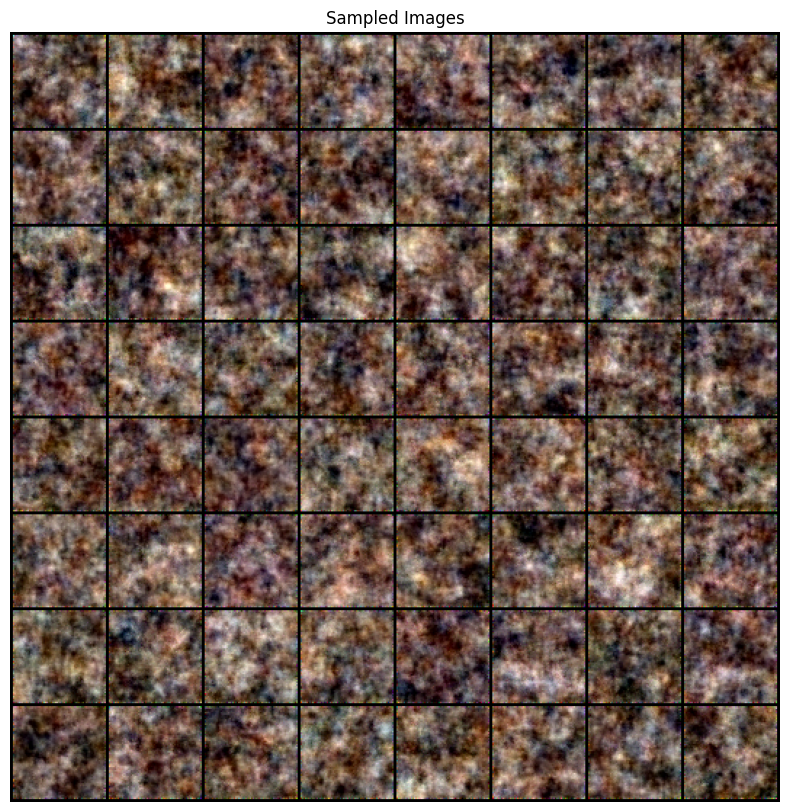

In [18]:
plot_image(sampled_images)

In [ ]:
# Load the model from checkpoint 10
#trainer.load('15')

# Generate predictions (sample images) using the loaded model
#sample_images2 = trainer.model.p_sample_loop(shape=(16, 3, 64, 64))  # Adjust shape as needed
#plot_image(sample_images2)

In [10]:
from torchmetrics.image.fid import FrechetInceptionDistance
from PIL import Image

In [11]:
def interpolate(batch):
    arr = []
    for img in batch:
        pil_img = transforms.ToPILImage()(img)
        resized_img = pil_img.resize((299,299), Image.BILINEAR)
        arr.append(transforms.ToTensor()(resized_img))
    return torch.stack(arr)


def evaluation_step(engine, batch):
    with torch.no_grad():
        fake_batch = diffusion.sample(batch_size = 128)
        fake = interpolate(fake_batch)
        real = interpolate(batch[0])
        return fake, real

In [19]:
from torchmetrics.image.fid import FrechetInceptionDistance
from ignite.metrics import FID, InceptionScore
from ignite.engine import Engine, Events

fid = FrechetInceptionDistance(feature=192, normalize = True,reset_real_features = False)
fid.set_dtype(torch.float64)
real_images = next(iter(test_dataloader))[0]
fid.update(real_images, real=True)
fid_values =[]


is_metric = InceptionScore(device=device, output_transform=lambda x: x[0])

is_values = []
for epoch in range(num_epochs):
    evaluator = Engine(evaluation_step)
    is_metric.attach(evaluator, "is")

    evaluator.run(test_dataloader,max_epochs=1)
    metrics = evaluator.state.metrics
    is_score = metrics['is']
    is_values.append(is_score)

    generated_images = diffusion.sample(batch_size = 128).detach().cpu() #remplace par ta ligne de génération d'image et faut tu en génère 128 donc shape(128,3,64,64)
    fid.update(generated_images, real=False)
    fid_values.append(fid.compute())
    fid.reset()

ModuleNotFoundError: FrechetInceptionDistance metric requires that `Torch-fidelity` is installed. Either install as `pip install torchmetrics[image]` or `pip install torch-fidelity`.

In [14]:
from torchmetrics.image.fid import FrechetInceptionDistance
from ignite.metrics import FID, InceptionScore
from ignite.engine import Engine, Events

fid = FrechetInceptionDistance(feature=192, normalize = True,reset_real_features = False)
fid.set_dtype(torch.float64)
real_images = next(iter(test_dataloader))[0]
fid.update(real_images, real=True)
fid_values =[]

is_metric = InceptionScore(device=device, output_transform=lambda x: x[0])

is_values = []

evaluator = Engine(evaluation_step)
is_metric.attach(evaluator, "is")

evaluator.run(test_dataloader,max_epochs=1)
metrics = evaluator.state.metrics
is_score = metrics['is']
is_values.append(is_score)

generated_images = diffusion.sample(batch_size = 128).detach().cpu() #remplace par ta ligne de génération d'image et faut tu en génère 128 donc shape(128,3,64,64)
fid.update(generated_images, real=False)
fid_values.append(fid.compute())
fid.reset()

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:01<00:00, 75.3MB/s] 


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

In [16]:
fid_values
is_values

[1.064900751078672]

<Figure size 640x480 with 0 Axes>

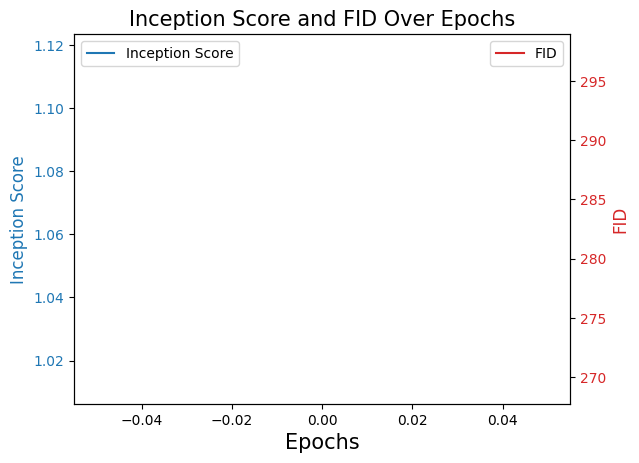

In [17]:
#Create a new figure
plt.figure()

#Plot Inception Score on the left y-axis
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Epochs', fontsize=15)
ax1.set_ylabel('Inception Score', color=color, fontsize=12)
ax1.plot(is_values, color=color, label='Inception Score')
ax1.tick_params(axis='y', labelcolor=color)

#Create a secondary y-axis for FID
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis
color = 'tab:red'
ax2.set_ylabel('FID', color=color, fontsize=12)  # Set label for FID
ax2.plot(fid_values, color=color, label='FID')
ax2.tick_params(axis='y', labelcolor=color)

#Set legends for both plots
ax1.legend(loc='upper left')  # Inception Score legend
ax2.legend(loc='upper right')  # FID legend

#Show the plot
plt.title('Inception Score and FID Over Epochs', fontsize=15)
plt.show()